# SMCA sphere initialization on Delaunay tetrahedral meshes 

## Volume error comparison for a sphere-octant in a tetrahedral mesh (Table 3) in

## Jones, B. W. S., Malan, A. G., & Ilangakoon, N. A. (2019). The initialisation of volume fractions for unstructured grids using implicit surface definitions. Computers and Fluids, 179, 194–205. https://doi.org/10.1016/j.compfluid.2018.10.021


In [1]:
import os
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import cycle

from plot_study import *

rcParams["text.usetex"] = True
rcParams["figure.dpi"] = 300 
rcParams["figure.figsize"] = (4,2.47)
rcParams["font.size"] = 9
rcParams["axes.titlesize"] = 9
rcParams["axes.labelsize"] = 9
global_markers = ['o', 'x', '^', 'v', 'd']

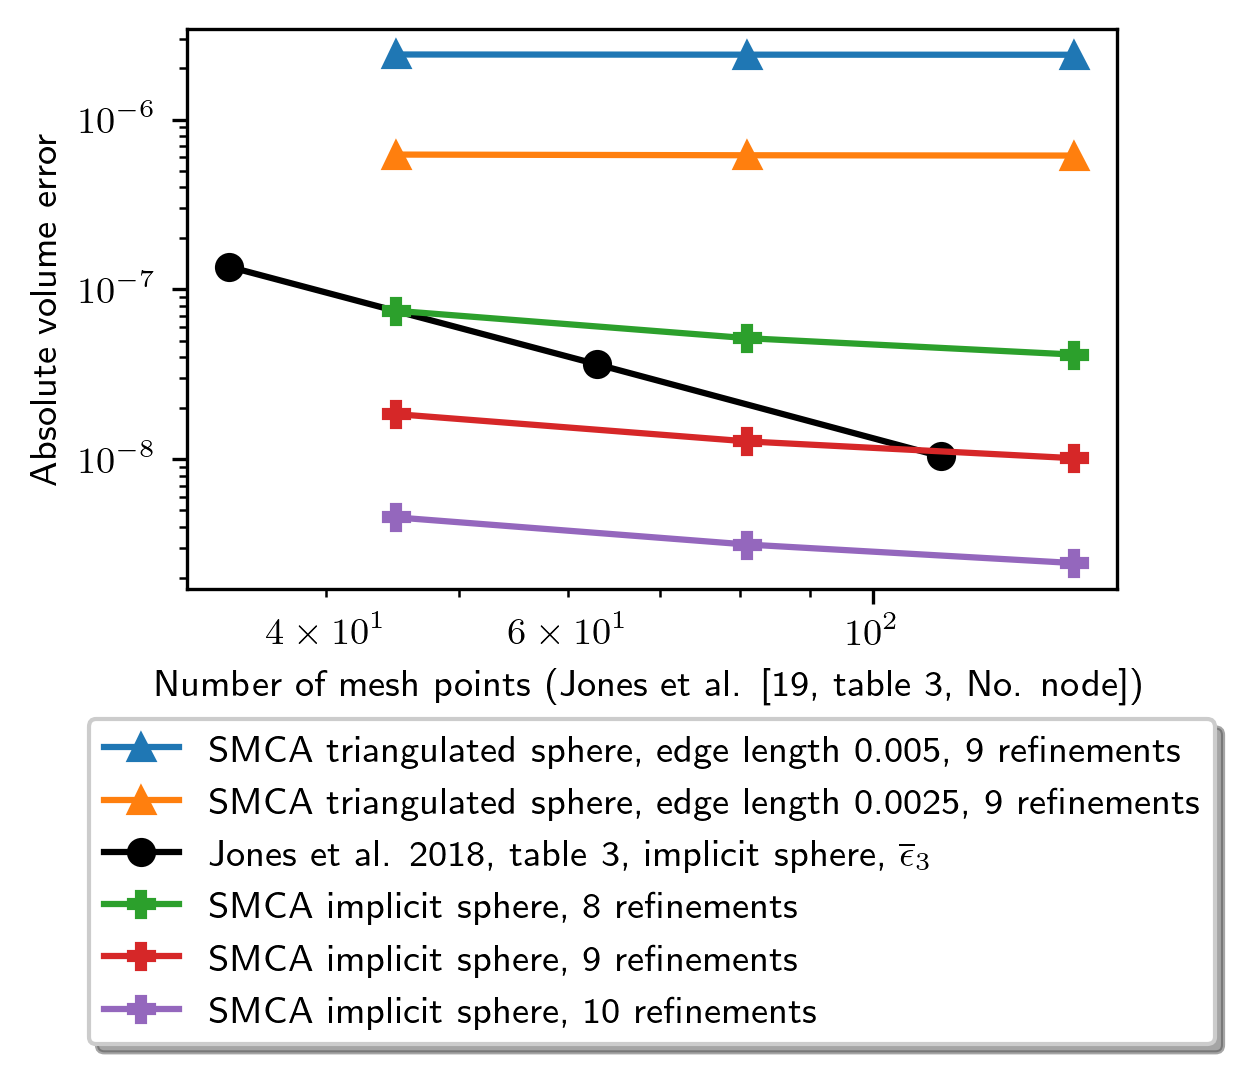

In [7]:
# Exact volume 
sphere_radius = 0.5
sphere_octant_volume = sphere_radius**3 * 4 * pi / 24.

# Absolute volume errors from Table 3  https://doi.org/10.1016/j.compfluid.2018.10.021
no_node = [34, 63, 112]
epsilon_3 = [1.36e-07,3.62e-08,1.04e-08]

# NoNodeSMCA (from j.compfluid.2018.10.021-table3-levelSet.parameter )
no_node_smca = [45, 81, 140]
# SMCA data
smca_lset_dframe = pd.read_json("j.compfluid.2018.10.021-table3-levelSet.json", orient='table')
idx = pd.IndexSlice

smca_lset_refine_8  = smca_lset_dframe.loc[idx[:,:,:,:,8,:,:,:,:]]
smca_lset_refine_9  = smca_lset_dframe.loc[idx[:,:,:,:,9,:,:,:,:]]
smca_lset_refine_10 = smca_lset_dframe.loc[idx[:,:,:,:,10,:,:,:,:]]

smca_lset_8_error = np.array((smca_lset_refine_8["VOLUME_FROM_VOLUME_FRACTION"] - sphere_octant_volume).abs())
smca_lset_9_error = np.array((smca_lset_refine_9["VOLUME_FROM_VOLUME_FRACTION"] - sphere_octant_volume).abs())
smca_lset_10_error = np.array((smca_lset_refine_10["VOLUME_FROM_VOLUME_FRACTION"] - sphere_octant_volume).abs())

# IndexSlice doesn't work for float64 values with JSON MultiIndex, switching to CSV
smca_trisurf_dframe = pd.read_csv("j.compfluid.2018.10.021-table3-triSurface.csv")

smca_trisurf_005 = smca_trisurf_dframe[smca_trisurf_dframe["TRIANGLE_EDGE_LENGTH"] == 0.005]
smca_trisurf_0025 = smca_trisurf_dframe[smca_trisurf_dframe["TRIANGLE_EDGE_LENGTH"] == 0.0025]

smca_trisurf_005_error = np.array((smca_trisurf_005["VOLUME_FROM_VOLUME_FRACTION"] - sphere_octant_volume).abs())
smca_trisurf_0025_error = np.array((smca_trisurf_0025["VOLUME_FROM_VOLUME_FRACTION"] - sphere_octant_volume).abs())

plt.plot(no_node_smca, smca_trisurf_005_error, '-^', label='SMCA triangulated sphere, edge length 0.005, 9 refinements')
plt.plot(no_node_smca, smca_trisurf_0025_error, '-^', label='SMCA triangulated sphere, edge length 0.0025, 9 refinements')

plt.plot(no_node, epsilon_3, 'k-o', label='Jones et al. 2018, table 3, implicit sphere, $\overline{\epsilon}_3$')

plt.plot(no_node_smca, smca_lset_8_error, '-P', label='SMCA implicit sphere, 8 refinements')
plt.plot(no_node_smca, smca_lset_9_error, '-P', label='SMCA implicit sphere, 9 refinements')
plt.plot(no_node_smca, smca_lset_10_error, '-P', label='SMCA implicit sphere, 10 refinements')


plt.ylabel("Absolute volume error")
plt.xlabel("Number of mesh points (Jones et al. [19, table 3, No. node])")
plt.loglog()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=1)
plt.savefig("j.compfluid.2018.10.021.pdf", bbox_inches="tight")